<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r12-unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-3-r12.csv?token=AKVFSOG3IAQJU2HK67G4XUS6ZQFBU')
print(df.shape)
df

(8715, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,1209,0,3,1,1,4,3,9,3,3,28,12,25,6,6,1.0,28,1,1,1,1,1,0,1,4,100,3,27,9,1
1,1217,2,0,2,1,4,3,9,28,12,27,11,25,4,0,0.0,4,1,1,1,1,1,0,2,8,200,6,27,18,1
2,1248,0,3,1,1,4,3,9,0,0,28,12,26,3,3,1.0,16,1,1,1,1,1,0,1,4,104,3,27,9,1
3,1256,2,0,2,1,4,3,10,28,12,27,11,26,4,0,0.0,4,1,1,1,1,1,0,2,8,208,6,30,18,1
4,1289,0,3,3,1,4,3,9,27,11,28,12,25,4,4,1.0,23,1,1,1,1,1,0,3,12,300,9,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8710,3267484,2,0,6,4,2,3,10,28,12,27,11,20028,4,0,0.0,25,1,1,1,1,1,0,24,48,961344,18,30,54,1
8711,3267491,2,0,6,5,3,3,10,28,12,27,11,20028,4,0,0.0,32,1,1,1,1,1,0,30,90,1802520,18,30,54,1
8712,3267492,2,0,2,1,4,3,11,28,12,27,11,20029,4,0,0.0,32,1,1,1,1,1,0,2,8,160232,6,33,18,1
8713,3267493,2,0,7,1,4,3,12,28,12,3,3,20028,6,0,0.0,5,1,1,1,1,1,0,7,28,560784,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-1-r12.csv?token=AKVFSOB6RDTURM5OVCVVJK26ZQFB2')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-6-r12.csv?token=AKVFSOCMDBJSQN452XGTK4S6ZQFCE')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-9-r12.csv?token=AKVFSOFXGPNFQAPHT5BNR7C6ZQFCK')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-14-r12.csv?token=AKVFSOG4A6DWDJJZ4ZNCYBC6ZQFC2')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-5-r12.csv?token=AKVFSOEDZHZZCWYZ2Q7GHSC6ZQFI2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-12-r12.csv?token=AKVFSOGDLV3OI5A7PXLB3J26ZQFJA')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-15-r12.csv?token=AKVFSOCUMEDQZIC6XCBX3PS6ZQFJC')

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(12725, 30)
(12725, 30)
(12683, 30)
(17945, 30)
(8757, 30)
(68641, 30)
(13953, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [7]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,12,12,23,7,2,5,0,0.00,4,1,1,1,1,1,0,1,4,8,3,27,9,1
1,96,3,2,1,1,4,3,9,15,15,24,8,3,4,3,0.75,16,1,1,1,1,1,6,1,4,12,3,27,9,1
2,104,0,3,4,1,1,5,17,23,7,12,12,2,5,5,1.00,24,11,1,11,11,121,0,4,4,8,20,85,100,1
3,105,0,3,4,2,2,5,17,23,7,12,12,2,5,5,1.00,25,10,2,11,20,220,0,8,16,32,20,85,100,1
4,106,0,3,4,3,2,5,17,23,7,12,12,2,5,5,1.00,26,9,3,11,27,297,0,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156139,3273988,2,0,6,4,2,3,10,28,12,27,11,20043,4,0,0.00,25,1,1,1,1,1,0,24,48,962064,18,30,54,1
156140,3273995,2,0,6,5,3,3,10,28,12,27,11,20043,4,0,0.00,32,1,1,1,1,1,0,30,90,1803870,18,30,54,1
156141,3273996,2,0,2,1,4,3,11,28,12,27,11,20044,4,0,0.00,32,1,1,1,1,1,0,2,8,160352,6,33,18,1
156142,3273997,2,0,7,1,4,3,12,28,12,15,15,20043,3,0,0.00,5,1,1,1,1,1,0,7,28,561204,21,36,63,1


In [8]:
df.shape

(156144, 30)

Test Data

In [9]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-2-r12.csv?token=AKVFSOBSSTYO2A5NFYDKR5C6ZQFN2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-5-r12.csv?token=AKVFSODWJDT7WPUOUPPO7RK6ZQFN6')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-10-r12.csv?token=AKVFSOBQC4O3AM7NQJLQS326ZQFOE')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-12-r12.csv?token=AKVFSOCSFXD7337OS2D4OOC6ZQFOK')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-13-r12.csv?token=AKVFSOHPPNOME53W62FUGMS6ZQFOO')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-15-r12.csv?token=AKVFSOH5KNQAXP4BNRMGKOS6ZQFOS')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-10-r12.csv?token=AKVFSOBUS5WTTRIBIRRT44C6ZQFUK')
df5.shape

(12725, 30)

In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,1209,0,3,1,1,4,3,9,3,3,28,12,37,6,6,1.0,28,1,1,1,1,1,0,1,4,148,3,27,9,0
1,1217,2,0,2,1,4,3,9,28,12,27,11,37,4,0,0.0,4,1,1,1,1,1,0,2,8,296,6,27,18,0
2,1231,0,3,1,1,4,3,9,2,2,28,12,38,5,5,1.0,24,1,1,1,1,1,0,1,4,152,3,27,9,0
3,1239,2,0,2,1,4,3,10,28,12,27,11,38,4,0,0.0,4,1,1,1,1,1,0,2,8,304,6,30,18,0
4,1272,0,3,1,1,4,3,9,0,0,28,12,39,3,3,1.0,16,1,1,1,1,1,0,1,4,156,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,3269005,2,0,6,4,2,3,10,28,12,27,11,30051,4,0,0.0,25,1,1,1,1,1,0,24,48,1442448,18,30,54,0
12721,3269012,2,0,6,5,3,3,10,28,12,27,11,30051,4,0,0.0,32,1,1,1,1,1,0,30,90,2704590,18,30,54,0
12722,3269013,2,0,2,1,4,3,11,28,12,27,11,30052,4,0,0.0,32,1,1,1,1,1,0,2,8,240416,6,33,18,0
12723,3269014,2,0,7,1,4,3,12,28,12,3,3,30051,6,0,0.0,6,1,1,1,1,1,0,7,28,841428,21,36,63,0


In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.739141,0.262189,-0.067789,0.098036,-0.473793,-0.358527,0.015703,0.210948,-0.634962,-0.808122,-0.235159,-0.152164,0.002402,-0.092359,-0.064459,-0.042191,0.520084,0.059535,0.076424,0.067216,-0.035208,-0.433407,-0.302317,-0.049090
inport,-0.739141,1.000000,-0.208074,-0.007092,0.010256,0.474966,0.278831,-0.012931,-0.024140,0.855358,0.981552,0.292412,0.070474,-0.104928,-0.021248,-0.030774,-0.032200,0.120154,-0.137534,-0.105562,-0.090018,0.086537,0.401567,0.333878,-0.016196
cache_coherence_type,0.262189,-0.208074,1.000000,0.184520,-0.266851,-0.204028,-0.223410,0.072179,0.107723,-0.179841,-0.236699,-0.428298,-0.028069,-0.108070,-0.083957,-0.047694,-0.024160,0.145074,0.416675,0.385800,0.319070,0.814870,-0.214827,0.368923,-0.091137
flit_id,-0.067789,-0.007092,0.184520,1.000000,-0.125431,0.160421,0.147265,-0.015369,-0.074031,-0.026176,0.013911,0.420335,-0.011148,0.123234,0.069124,0.081051,0.053519,-0.109492,0.954961,0.891497,0.633663,0.267636,0.157314,0.256126,0.059631
flit_type,0.098036,0.010256,-0.266851,-0.125431,1.000000,-0.231999,-0.212973,0.022227,0.107062,0.037855,-0.020118,0.329901,-0.159140,0.011346,-0.091145,-0.096641,-0.064491,0.158347,-0.166882,0.128187,0.094766,-0.387052,-0.227506,-0.370407,-0.086238
vnet,-0.473793,0.474966,-0.204028,0.160421,-0.231999,1.000000,0.942492,-0.180924,-0.267922,0.252248,0.478322,-0.159074,0.313822,0.169554,0.298100,0.211072,0.115735,-0.159367,-0.003728,-0.038280,-0.120647,0.401195,0.990638,0.834638,0.337916
vc,-0.358527,0.278831,-0.223410,0.147265,-0.212973,0.942492,1.000000,-0.179764,-0.273249,0.080529,0.289494,-0.197636,0.305218,0.202322,0.313001,0.224790,0.127810,-0.235602,-0.002557,-0.041158,-0.120734,0.349009,0.979295,0.769133,0.341325
traversal_id,0.015703,-0.012931,0.072179,-0.015369,0.022227,-0.180924,-0.179764,1.000000,0.077694,0.031668,-0.014497,0.095840,-0.095335,-0.095291,-0.117560,-0.079303,-0.046742,0.015962,0.029479,0.027550,0.541834,-0.039589,-0.183006,-0.131165,-0.412855
hop_count,0.210948,-0.024140,0.107723,-0.074031,0.107062,-0.267922,-0.273249,0.077694,1.000000,0.346250,-0.075839,0.268548,-0.200923,-0.174483,-0.231514,-0.176369,-0.119855,0.262259,-0.012946,0.012793,0.049294,-0.057843,-0.273883,-0.193765,-0.217974
current_hop,-0.634962,0.855358,-0.179841,-0.026176,0.037855,0.252248,0.080529,0.031668,0.346250,1.000000,0.848298,0.471335,-0.001363,-0.142622,-0.088796,-0.079175,-0.061352,0.099122,-0.122307,-0.092947,-0.057530,-0.018918,0.185675,0.138307,-0.097168


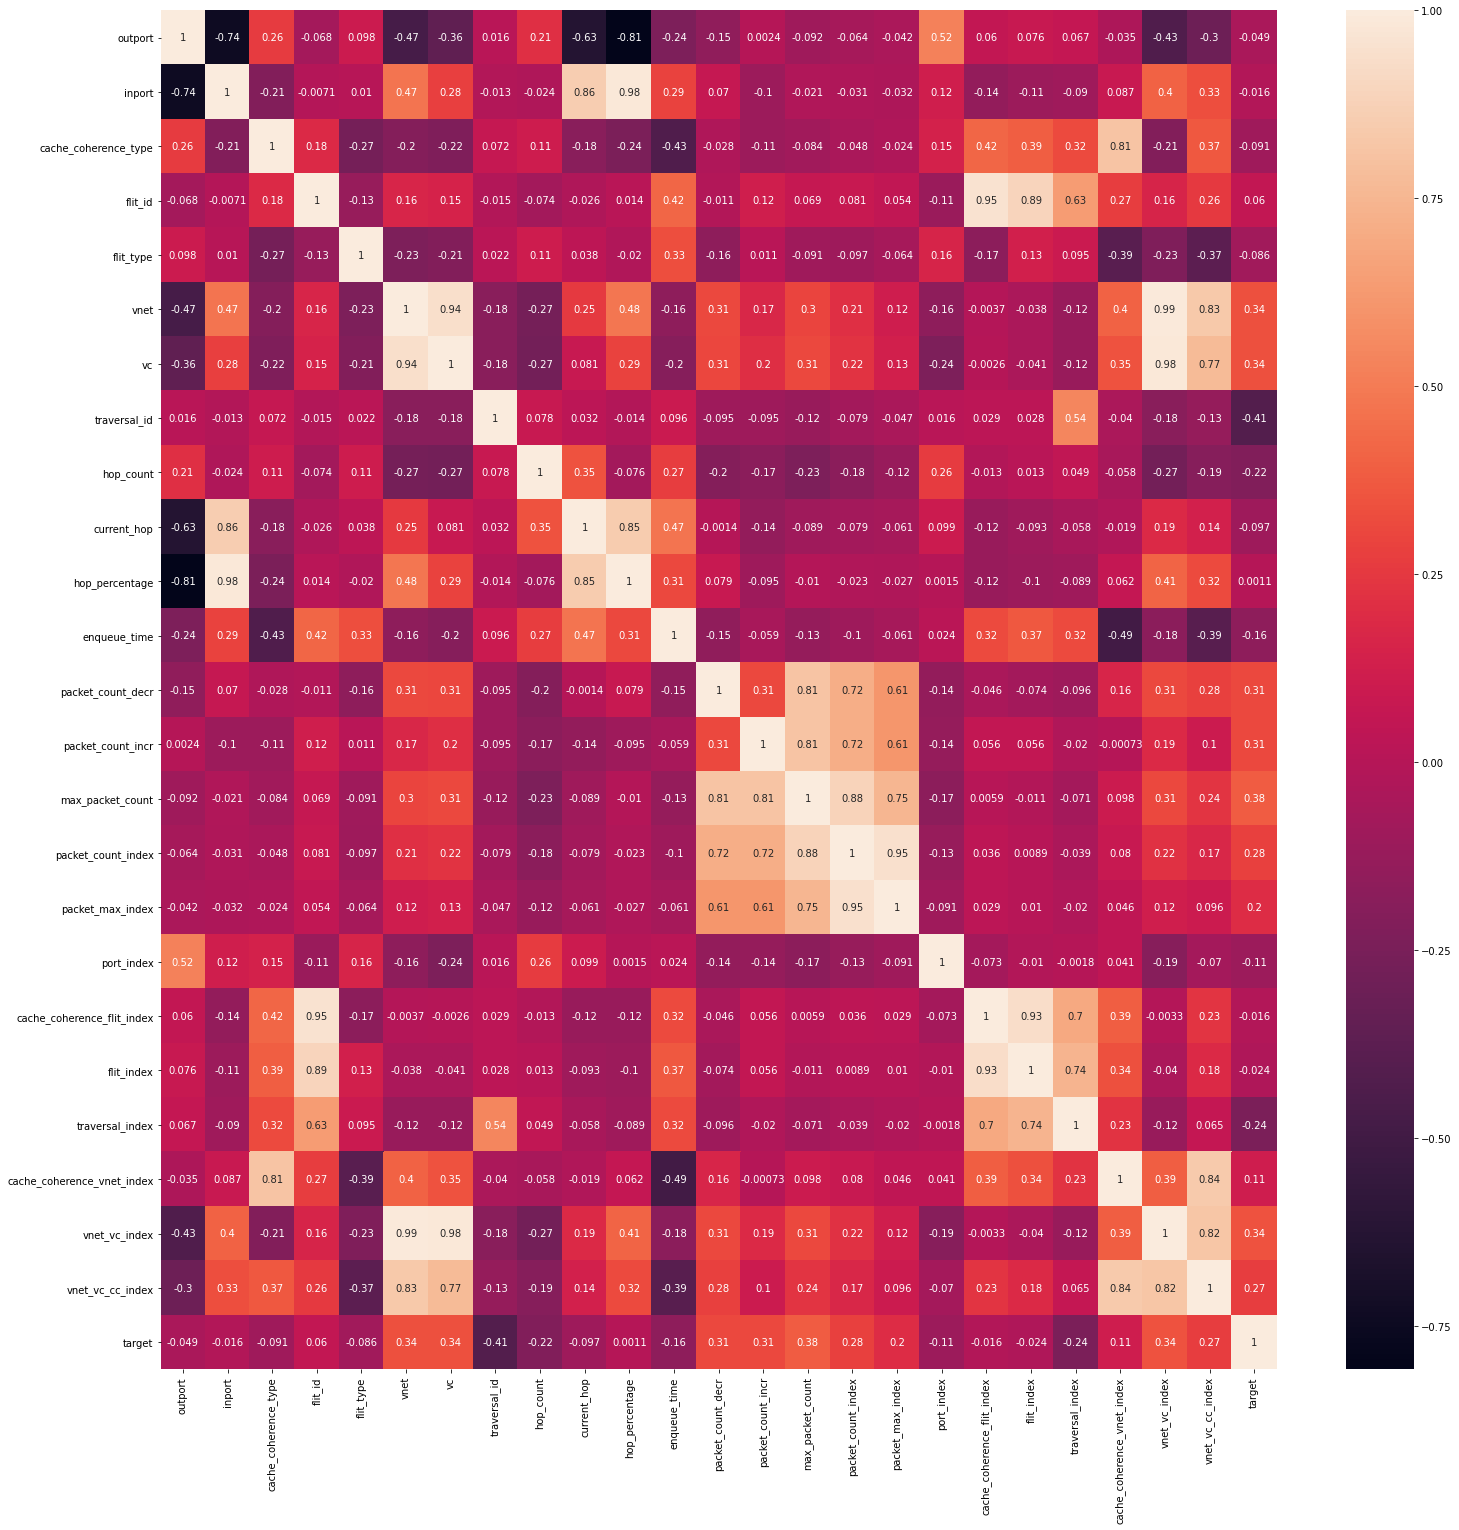

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [15]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,5,0,0.00,4,1,1,1,1,1,0,1,4,8,3,27,9
1,3,2,1,1,4,3,9,3,4,3,0.75,16,1,1,1,1,1,6,1,4,12,3,27,9
2,0,3,4,1,1,5,17,2,5,5,1.00,24,11,1,11,11,121,0,4,4,8,20,85,100
3,0,3,4,2,2,5,17,2,5,5,1.00,25,10,2,11,20,220,0,8,16,32,20,85,100
4,0,3,4,3,2,5,17,2,5,5,1.00,26,9,3,11,27,297,0,12,24,48,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156139,2,0,6,4,2,3,10,20043,4,0,0.00,25,1,1,1,1,1,0,24,48,962064,18,30,54
156140,2,0,6,5,3,3,10,20043,4,0,0.00,32,1,1,1,1,1,0,30,90,1803870,18,30,54
156141,2,0,2,1,4,3,11,20044,4,0,0.00,32,1,1,1,1,1,0,2,8,160352,6,33,18
156142,2,0,7,1,4,3,12,20043,3,0,0.00,5,1,1,1,1,1,0,7,28,561204,21,36,63


In [16]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.666667,0.000000,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.666667,0.500000,0.75,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.303030,0.416667,0.000000,0.416667,0.059524,0.028409,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.000000,1.000000,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.318182,0.375000,0.041667,0.416667,0.113095,0.051847,0.0,0.241379,0.139535,0.000009,0.944444,1.000000,1.000000
4,0.000000,1.000000,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.333333,0.333333,0.083333,0.416667,0.154762,0.070076,0.0,0.379310,0.232558,0.000015,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156139,0.666667,0.000000,0.833333,0.75,0.333333,0.0,0.125,0.666412,0.666667,0.000000,0.00,0.318182,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.355441,0.833333,0.051724,0.494505
156140,0.666667,0.000000,0.833333,1.00,0.666667,0.0,0.125,0.666412,0.666667,0.000000,0.00,0.424242,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.666455,0.833333,0.051724,0.494505
156141,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.250,0.666445,0.666667,0.000000,0.00,0.424242,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.059241,0.166667,0.103448,0.098901
156142,0.666667,0.000000,1.000000,0.00,1.000000,0.0,0.375,0.666412,0.500000,0.000000,0.00,0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.207340,1.000000,0.155172,0.593407


In [17]:
train_X[train_X.duplicated()].shape

(2289, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [19]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.0,0.452830,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000055,0.166667,0.000000,0.166667
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.666667,0.833333,1.0,0.377358,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000058,0.166667,0.333333,0.166667
4,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.000000,0.500000,1.0,0.226415,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,0.666667,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533308,0.833333,0.333333,0.833333
12721,0.666667,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
12722,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.0,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088842,0.166667,0.666667,0.166667
12723,0.666667,0.0,1.000000,0.00,1.000000,0.0,1.000000,0.999967,1.000000,0.000000,0.0,0.037736,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311073,1.000000,1.000000,1.000000


In [20]:
test_X[test_X.duplicated()].shape

(0, 24)

In [21]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.500000,1.0,0.206897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000055,0.166667,0.000000,0.166667
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,1.000000,1.000000,1.0,0.413793,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000058,0.166667,0.333333,0.166667
4,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.000000,0.500000,1.0,0.206897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12678,0.666667,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.362069,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533308,0.833333,0.333333,0.833333
12679,0.666667,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
12680,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.0,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088842,0.166667,0.666667,0.166667
12681,0.666667,0.0,1.000000,0.00,1.000000,0.0,1.000000,0.999967,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311073,1.000000,1.000000,1.000000


In [22]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.500000,1.0,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000055,0.166667,0.000000,0.166667
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,1.000000,1.000000,1.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000058,0.166667,0.333333,0.166667
4,0.000000,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.666667,1.0,0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000109,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12678,0.666667,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533308,0.833333,0.333333,0.833333
12679,0.666667,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
12680,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088842,0.166667,0.666667,0.166667
12681,0.666667,0.0,1.000000,0.00,1.000000,0.0,1.000000,0.999967,1.000000,0.000000,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311073,1.000000,1.000000,1.000000


In [23]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(3, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.666667,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.0,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.833333,0.833333,1.0,0.350877,0.357143,0.000000,0.357143,0.044643,0.018394,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.000000,1.0,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.0,0.368421,0.321429,0.035714,0.357143,0.084821,0.033568,0.0,0.241379,0.139535,0.000013,0.944444,1.000000,1.000000
3,0.000000,1.0,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.0,0.385965,0.285714,0.071429,0.357143,0.116071,0.045371,0.0,0.379310,0.232558,0.000022,0.944444,1.000000,1.000000
4,0.000000,1.0,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.0,0.403509,0.250000,0.107143,0.357143,0.138393,0.053801,0.0,0.517241,0.325581,0.000031,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72647,0.666667,0.0,0.666667,0.50,0.333333,0.0,0.000,0.999967,0.666667,0.000000,0.0,0.245614,0.107143,0.250000,0.357143,0.138393,0.053801,0.0,0.482759,0.302326,0.333508,0.666667,0.000000,0.395604
72648,0.666667,0.0,0.666667,0.75,0.333333,0.0,0.000,0.999967,0.666667,0.000000,0.0,0.368421,0.071429,0.285714,0.357143,0.116071,0.045371,0.0,0.655172,0.418605,0.444679,0.666667,0.000000,0.395604
72649,0.666667,0.0,0.666667,1.00,0.666667,0.0,0.000,0.999967,0.666667,0.000000,0.0,0.491228,0.035714,0.321429,0.357143,0.084821,0.033568,0.0,0.827586,0.825581,0.833776,0.666667,0.000000,0.395604
72650,0.666667,0.0,0.000000,0.00,1.000000,0.0,0.125,1.000000,0.666667,0.000000,0.0,0.491228,0.000000,0.357143,0.357143,0.044643,0.018394,0.0,0.000000,0.000000,0.044465,0.000000,0.051724,0.000000


In [24]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(46, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.2,0.166667,0.500000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.0,1.0,0.0,0.000000,0.000998,0.4,0.166667,0.333333,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.001065,1.0,1.000000,1.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000047,0.000000,0.000000,0.000000
3,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.000000,0.001065,0.6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000102,0.166667,0.000000,0.166667
4,0.000000,0.666667,0.000000,0.0,1.0,0.0,0.000000,0.001098,0.0,0.166667,1.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17982,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.666667,0.999534,0.6,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088888,0.166667,0.666667,0.166667
17983,1.000000,0.000000,1.000000,0.0,1.0,0.0,1.000000,0.999468,0.4,0.000000,0.000000,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311106,1.000000,1.000000,1.000000
17984,0.000000,1.000000,0.333333,0.0,1.0,0.0,0.000000,0.999534,0.6,0.666667,1.000000,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133336,0.333333,0.000000,0.333333
17985,1.000000,0.666667,1.000000,0.0,1.0,0.0,0.000000,0.999867,0.6,0.166667,0.250000,0.107143,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.311230,1.000000,0.000000,1.000000


In [25]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(31, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.500000,0.75,0.226415,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000998,0.666667,0.500000,0.60,0.226415,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.001065,1.000000,1.000000,1.00,0.452830,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000047,0.000000,0.000000,0.000000
3,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.001065,0.333333,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000102,0.166667,0.000000,0.166667
4,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.001098,0.000000,0.500000,1.00,0.226415,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17946,0.666667,0.000000,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.00,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533330,0.833333,0.333333,0.833333
17947,0.666667,0.000000,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.00,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
17948,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.00,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088885,0.166667,0.666667,0.166667
17949,0.666667,0.000000,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.000000,0.000000,0.00,0.037736,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311106,1.000000,1.000000,1.000000


In [26]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.75,1.00,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000053,0.166667,0.000000,0.166667
2,0.000000,1.000000,0.333333,0.0,1.0,0.0,0.000000,0.000000,0.333333,1.00,1.00,0.431818,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000106,0.333333,0.000000,0.333333
3,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000100,0.000000,0.75,1.00,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
4,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.333333,0.000100,0.333333,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000062,0.166667,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.666667,0.999650,0.333333,0.00,0.00,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088845,0.166667,0.666667,0.166667
8753,1.000000,0.000000,1.000000,0.0,1.0,0.0,1.000000,0.999601,0.000000,0.00,0.00,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311074,1.000000,1.000000,1.000000
8754,0.000000,1.000000,0.333333,0.0,1.0,0.0,0.000000,0.999650,0.333333,1.00,1.00,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133294,0.333333,0.000000,0.333333
8755,1.000000,0.666667,1.000000,0.0,1.0,0.0,0.000000,0.999900,0.333333,0.25,0.25,0.113636,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.311168,1.000000,0.000000,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [28]:
train_Y = df['target']
train_Y.value_counts()

1    100066
0     56078
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs         Score
5                         vnet  11821.013545
22               vnet_vc_index   9567.983736
6                           vc   7428.846222
14            max_packet_count   5368.715859
7                 traversal_id   3086.353855
12           packet_count_decr   2691.475335
13           packet_count_incr   2677.241605
15          packet_count_index   1772.420902
23            vnet_vc_cc_index   1441.954815
17                  port_index   1218.482886
20             traversal_index   1200.869688
16            packet_max_index    814.562532
8                    hop_count    515.801594
9                  current_hop    426.485577
11                enqueue_time    399.477127
4                    flit_type    220.392696
21  cache_coherence_vnet_index    190.374615


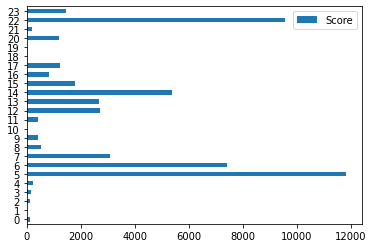

In [31]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [34]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 78.49737821718769
Test Prediction  78.2221652950783


In [36]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  36.14931237721022


In [37]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  33.548844910510134


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  33.635575179373966


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  9.736827616583163


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  36.17612720297993


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  30.17659183332405


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  70.54927486582163


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
14,max_packet_count,12.740506
3,flit_id,8.295748
12,packet_count_decr,6.398348
13,packet_count_incr,6.342158
5,vnet,4.899082
23,vnet_vc_cc_index,2.917127
22,vnet_vc_index,2.290399
10,hop_percentage,1.605733
21,cache_coherence_vnet_index,1.286950
19,flit_index,0.808247


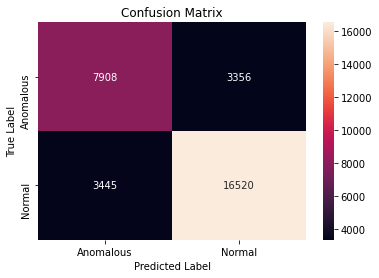

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11264
           1       0.83      0.83      0.83     19965

    accuracy                           0.78     31229
   macro avg       0.76      0.76      0.76     31229
weighted avg       0.78      0.78      0.78     31229



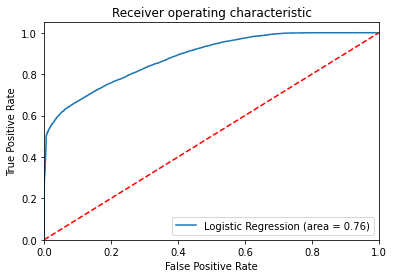

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

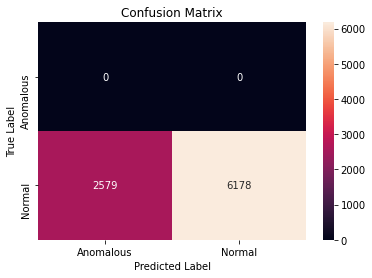

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.71      0.83      8757

    accuracy                           0.71      8757
   macro avg       0.50      0.35      0.41      8757
weighted avg       1.00      0.71      0.83      8757



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 91.4349757835328
Test Prediction  85.24128214159916


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  85.3909626719057


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.95624063707325


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  85.00354805645351


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  6.51324120464681


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  88.38049702562962


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  71.94585259874103


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  20.646340070800502


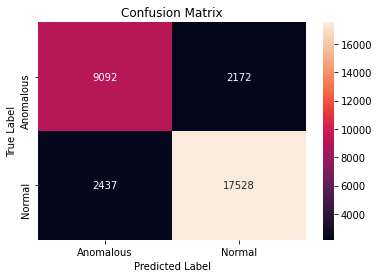

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     11264
           1       0.89      0.88      0.88     19965

    accuracy                           0.85     31229
   macro avg       0.84      0.84      0.84     31229
weighted avg       0.85      0.85      0.85     31229



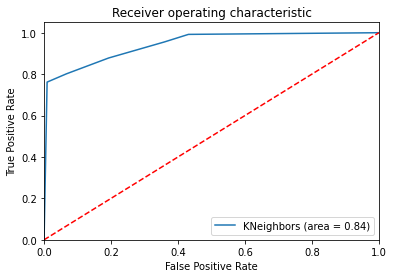

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

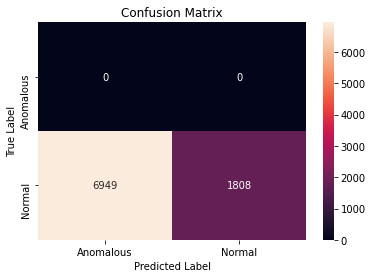

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.21      0.34      8757

    accuracy                           0.21      8757
   macro avg       0.50      0.10      0.17      8757
weighted avg       1.00      0.21      0.34      8757



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 67.8261217627987
Test Prediction Score 67.95926862851836


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 72.91159135559921


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  72.5143893400615


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  72.26996767326342


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  27.24632494631944


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  80.86951687329739


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  79.61116372346945


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  26.49309124129268


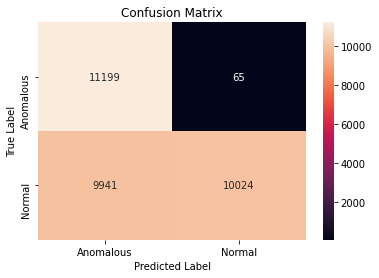

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.53      0.99      0.69     11264
           1       0.99      0.50      0.67     19965

    accuracy                           0.68     31229
   macro avg       0.76      0.75      0.68     31229
weighted avg       0.83      0.68      0.68     31229



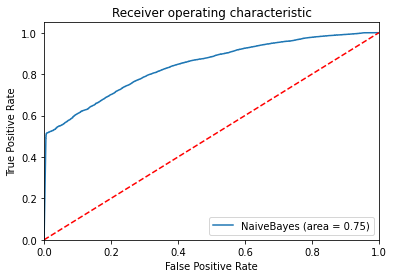

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 99932 samples, validate on 24983 samples
Epoch 1/10
99932/99932 [==============================] - 4s 40us/step - loss: 0.1851 - accuracy: 0.7299 - val_loss: 0.1426 - val_accuracy: 0.7886
Epoch 2/10
99932/99932 [==============================] - 4s 39us/step - loss: 0.1370 - accuracy: 0.7905 - val_loss: 0.1333 - val_accuracy: 0.7923
Epoch 3/10
99932/99932 [==============================] - 4s 39us/step - loss: 0.1320 - accuracy: 0.7928 - val_loss: 0.1305 - val_accuracy: 0.7943
Epoch 4/10
99932/99932 [==============================] - 4s 38us/step - loss: 0.1301 - accuracy: 0.7947 - val_loss: 0.1292 - val_accuracy: 0.7968
Epoch 5/10
99932/99932 [==============================] - 4s 38us/step - loss: 0.1289 - accuracy: 0.7956 - val_loss: 0.1281 - val_accuracy: 0.7953
Epoch 6/10
99932/99932 [==============================] - 4s 39us/step - loss: 0.1280 - accuracy: 0.7969 - val_loss: 0.1272 - val_accuracy: 0.7987
Epoch 7/10
99932/99932 [==============================] - 4s 38us/st

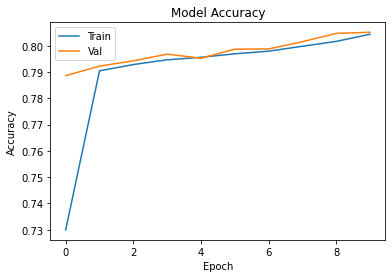

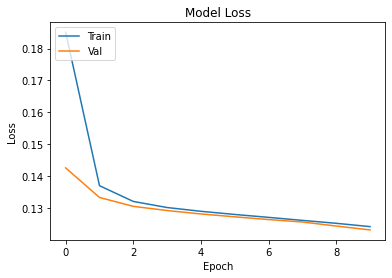

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.45%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 55.52%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.64%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.77%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 8.63%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.24%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 44.32%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 49.49%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 99932 samples, validate on 24983 samples
Epoch 1/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1966 - accuracy: 0.6653 - val_loss: 0.1762 - val_accuracy: 0.7194
Epoch 2/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1645 - accuracy: 0.7644 - val_loss: 0.1544 - val_accuracy: 0.7819
Epoch 3/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1496 - accuracy: 0.7847 - val_loss: 0.1448 - val_accuracy: 0.7880
Epoch 4/30
99932/99932 [==============================] - 4s 38us/step - loss: 0.1425 - accuracy: 0.7870 - val_loss: 0.1395 - val_accuracy: 0.7895
Epoch 5/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1381 - accuracy: 0.7885 - val_loss: 0.1357 - val_accuracy: 0.7921
Epoch 6/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1353 - accuracy: 0.7901 - val_loss: 0.1333 - val_accuracy: 0.7915
Epoch 7/30
99932/99932 [==============================] - 4s 38us/st

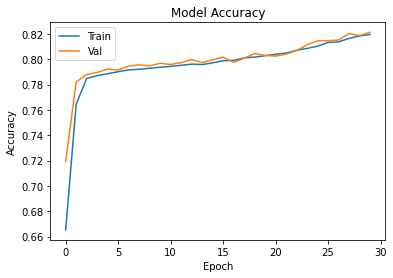

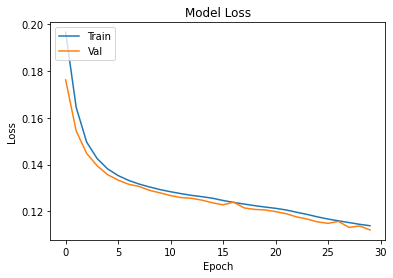

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.95%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 34.09%
accuracy: 27.21%
accuracy: 27.12%
accuracy: 4.73%
accuracy: 64.22%
accuracy: 25.40%
accuracy: 83.98%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 99932 samples, validate on 24983 samples
Epoch 1/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.2092 - accuracy: 0.6954 - val_loss: 0.1834 - val_accuracy: 0.7386
Epoch 2/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1667 - accuracy: 0.7642 - val_loss: 0.1555 - val_accuracy: 0.7793
Epoch 3/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1518 - accuracy: 0.7805 - val_loss: 0.1481 - val_accuracy: 0.7857
Epoch 4/30
99932/99932 [==============================] - 4s 39us/step - loss: 0.1460 - accuracy: 0.7841 - val_loss: 0.1431 - val_accuracy: 0.7888
Epoch 5/30
99932/99932 [==============================] - 4s 38us/step - loss: 0.1417 - accuracy: 0.7862 - val_loss: 0.1392 - val_accuracy: 0.7892
Epoch 6/30
99932/99932 [==============================] - 4s 38us/step - loss: 0.1382 - accuracy: 0.7887 - val_loss: 0.1361 - val_accuracy: 0.7957
Epoch 7/30
99932/99932 [==============================] - 4s 37us/st

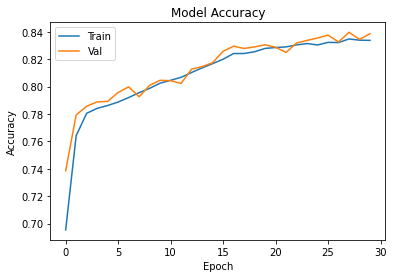

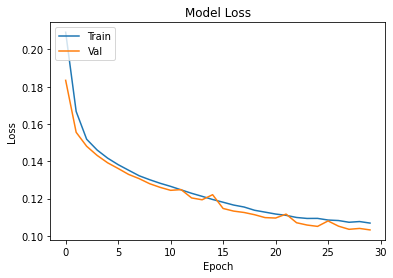

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.73%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.68%
accuracy: 65.16%
accuracy: 64.90%
accuracy: 5.02%
accuracy: 89.51%
accuracy: 50.26%
accuracy: 55.61%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 99932 samples, validate on 24983 samples
Epoch 1/100
99932/99932 [==============================] - 8s 78us/step - loss: 0.1132 - accuracy: 0.8180 - val_loss: 0.0959 - val_accuracy: 0.8405
Epoch 2/100
99932/99932 [==============================] - 7s 73us/step - loss: 0.0975 - accuracy: 0.8383 - val_loss: 0.0893 - val_accuracy: 0.8511
Epoch 3/100
99932/99932 [==============================] - 8s 77us/step - loss: 0.0945 - accuracy: 0.8402 - val_loss: 0.0878 - val_accuracy: 0.8508
Epoch 4/100
99932/99932 [==============================] - 8s 78us/step - loss: 0.0931 - accuracy: 0.8417 - val_loss: 0.0880 - val_accuracy: 0.8467
Epoch 5/100
99932/99932 [==============================] - 8s 85us/step - loss: 0.0914 - accuracy: 0.8444 - val_loss: 0.0856 - val_accuracy: 0.8523
Epoch 6/100
99932/99932 [==============================] - 8s 75us/step - loss: 0.0912 - accuracy: 0.8436 - val_loss: 0.0854 - val_accuracy: 0.8513
Epoch 7/100
99932/99932 [==============================] - 7s 

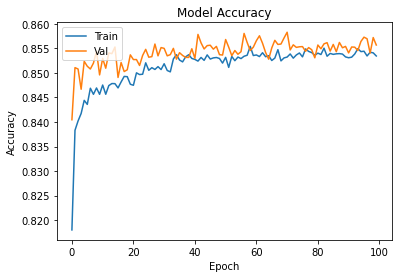

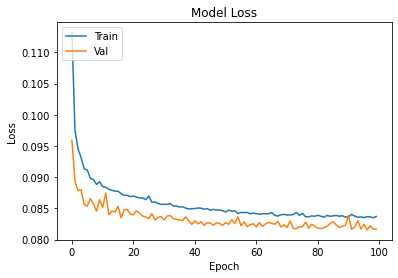

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.77%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.41%
accuracy: 43.92%
accuracy: 44.26%
accuracy: 8.81%
accuracy: 82.18%
accuracy: 42.29%
accuracy: 34.06%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 99932 samples, validate on 24983 samples
Epoch 1/50
99932/99932 [==============================] - 10s 96us/step - loss: 0.1132 - accuracy: 0.8193 - val_loss: 0.0936 - val_accuracy: 0.8467
Epoch 2/50
99932/99932 [==============================] - 9s 91us/step - loss: 0.0977 - accuracy: 0.8392 - val_loss: 0.0911 - val_accuracy: 0.8488
Epoch 3/50
99932/99932 [==============================] - 9s 86us/step - loss: 0.0946 - accuracy: 0.8411 - val_loss: 0.0863 - val_accuracy: 0.8498
Epoch 4/50
99932/99932 [==============================] - 9s 91us/step - loss: 0.0934 - accuracy: 0.8439 - val_loss: 0.0864 - val_accuracy: 0.8502
Epoch 5/50
99932/99932 [==============================] - 9s 90us/step - loss: 0.0922 - accuracy: 0.8455 - val_loss: 0.0854 - val_accuracy: 0.8517
Epoch 6/50
99932/99932 [==============================] - 9s 86us/step - loss: 0.0914 - accuracy: 0.8440 - val_loss: 0.0855 - val_accuracy: 0.8504
Epoch 7/50
99932/99932 [==============================] - 8s 85us/s

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.28%
accuracy: 73.45%
accuracy: 72.85%
accuracy: 5.54%
accuracy: 82.85%
accuracy: 50.96%
accuracy: 57.69%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.45647039987192
Test Prediction Score 90.49601332095169


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 76.73870333988212
Test Prediction Score 77.30032326736577
Test Prediction Score 77.30820783726247
Test Prediction Score 39.23223035842096
Test Prediction Score 60.40473675432256
Test Prediction Score 64.75405269901398
Test Prediction Score 24.346237295877586


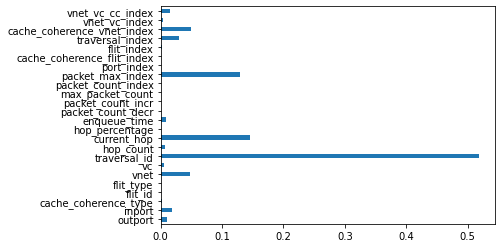

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

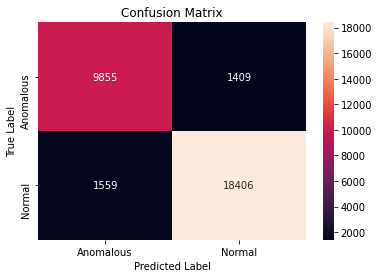

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11264
           1       0.93      0.92      0.93     19965

    accuracy                           0.90     31229
   macro avg       0.90      0.90      0.90     31229
weighted avg       0.91      0.90      0.91     31229



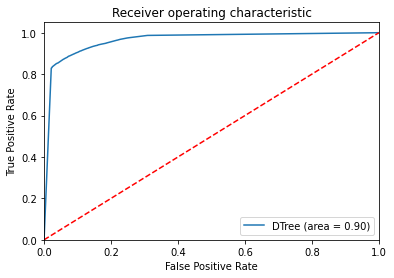

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.0251771204419
Test Prediction Score 92.55499695795575


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 72.6836935166994
Test Prediction Score 66.44327051959316
Test Prediction Score 66.89269100370575
Test Prediction Score 40.815118647800475
Test Prediction Score 73.49196642019236
Test Prediction Score 58.08590050693555
Test Prediction Score 19.527235354573484


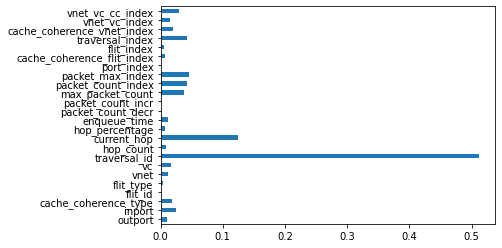

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

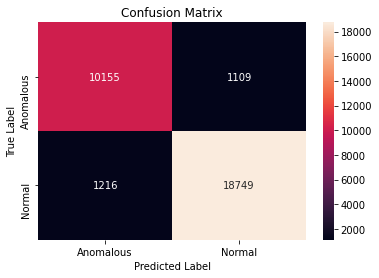

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     11264
           1       0.94      0.94      0.94     19965

    accuracy                           0.93     31229
   macro avg       0.92      0.92      0.92     31229
weighted avg       0.93      0.93      0.93     31229



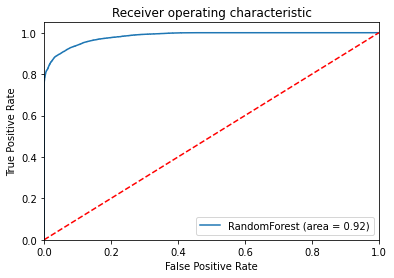

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [39]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [41]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.49085378057079
Test Prediction Score 96.19904575874988


In [42]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 74.93123772102162
Test Prediction Score 66.49846250887013
Test Prediction Score 66.7349996057715
Test Prediction Score 12.737433243406926
Test Prediction Score 76.97225774170235
Test Prediction Score 59.02178151635007
Test Prediction Score 27.395226675802213


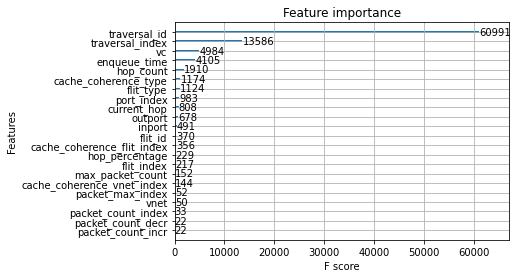

In [43]:
plot_importance(xgbc)
plt.show()

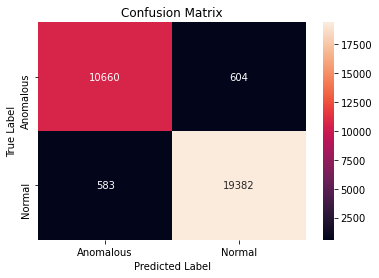

In [44]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11264
           1       0.97      0.97      0.97     19965

    accuracy                           0.96     31229
   macro avg       0.96      0.96      0.96     31229
weighted avg       0.96      0.96      0.96     31229



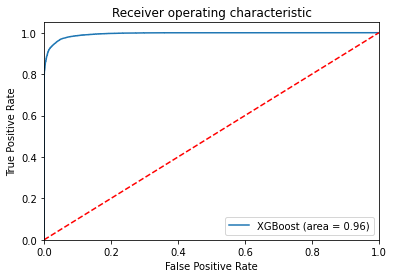

In [46]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [48]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [50]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 90.54717207701238
Test Prediction Score 88.43062538025553


In [51]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 77.14734774066798
Test Prediction Score 72.71938815737602
Test Prediction Score 72.93227154458725
Test Prediction Score 17.162638330672245
Test Prediction Score 83.7215766942792
Test Prediction Score 61.823853824299476
Test Prediction Score 19.984012789768187


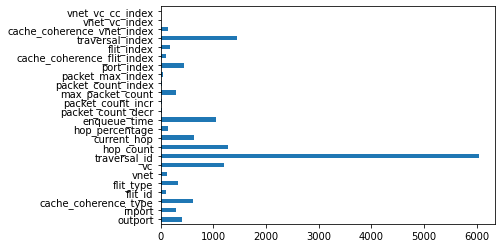

In [52]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

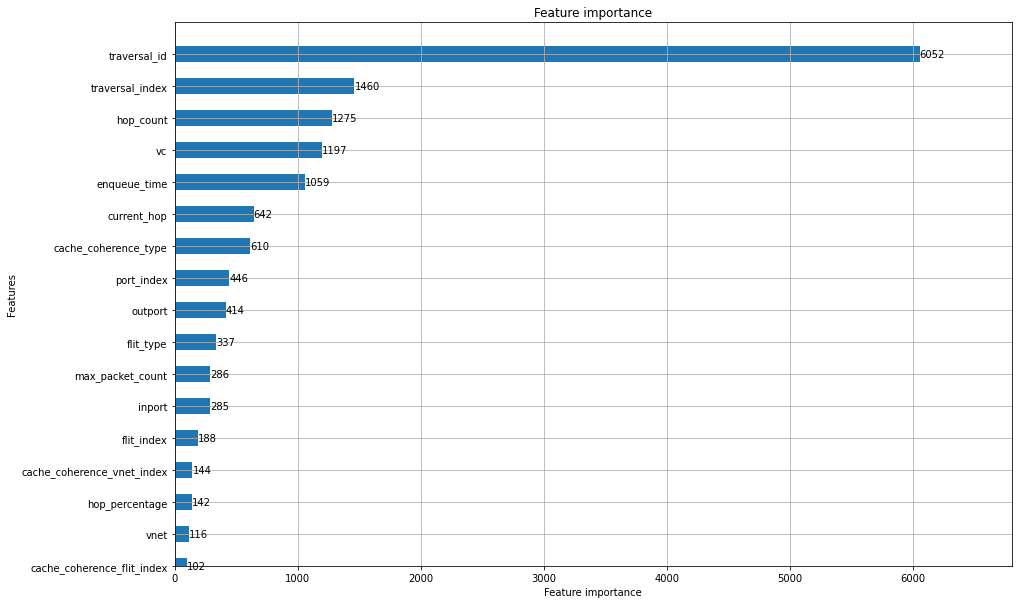

In [53]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [54]:
sorted(gbm.feature_importances_,reverse=True)

[6052,
 1460,
 1275,
 1197,
 1059,
 642,
 610,
 446,
 414,
 337,
 286,
 285,
 188,
 144,
 142,
 116,
 102,
 94,
 48,
 36,
 33,
 26,
 8,
 0]

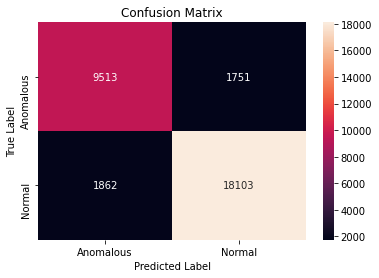

In [55]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     11264
           1       0.91      0.91      0.91     19965

    accuracy                           0.88     31229
   macro avg       0.87      0.88      0.87     31229
weighted avg       0.88      0.88      0.88     31229



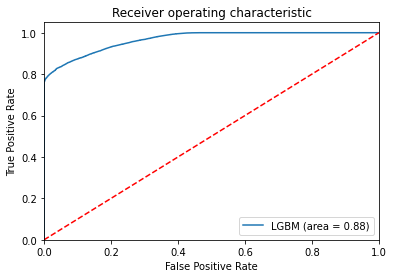

In [57]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()